In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# <center> Домашнее задание №3 </center>
#### Выполнил: Мартиросян Арутюн Артушович, группа ВВО-19

## <center> Решение уравнения теплопроводности </center>

### Задание

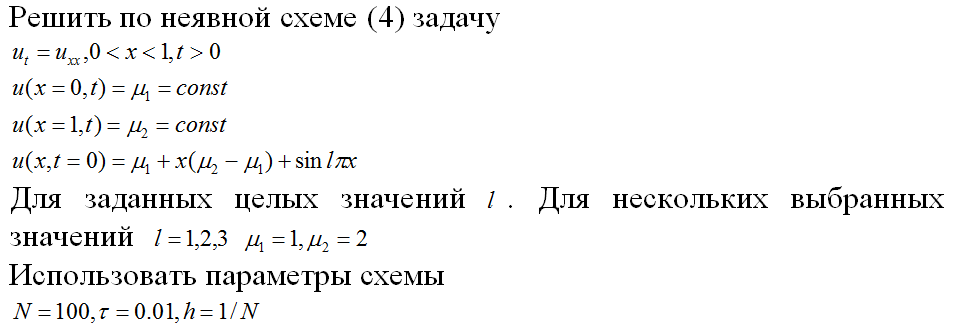

In [2]:
from IPython.display import Image
Image(filename='task3_equations(pic1).PNG', width=700, height=400)

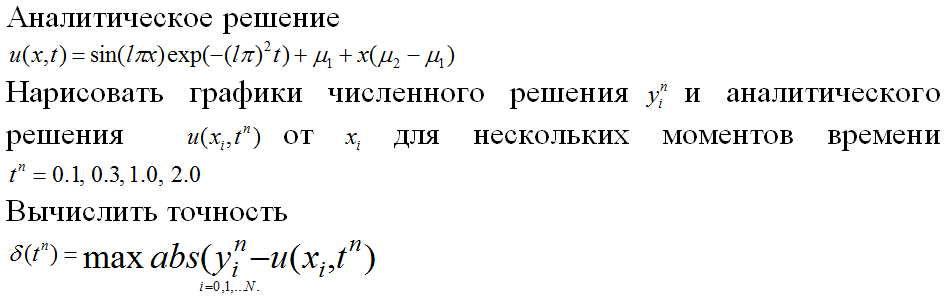

In [3]:
Image(filename='task3_equations(pic2).PNG', width=700, height=200)

### Задача

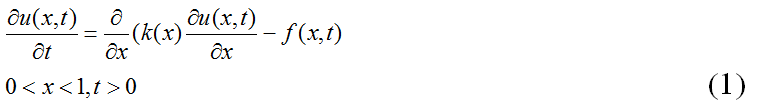

In [4]:
Image(filename='task3_equations(pic3).PNG', width=700, height=200)

### Численная схема

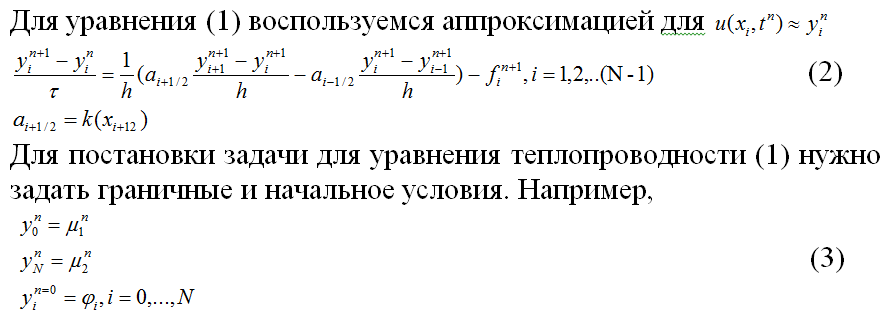

In [5]:
Image(filename='task3_equations(pic4).PNG', width=700, height=200)

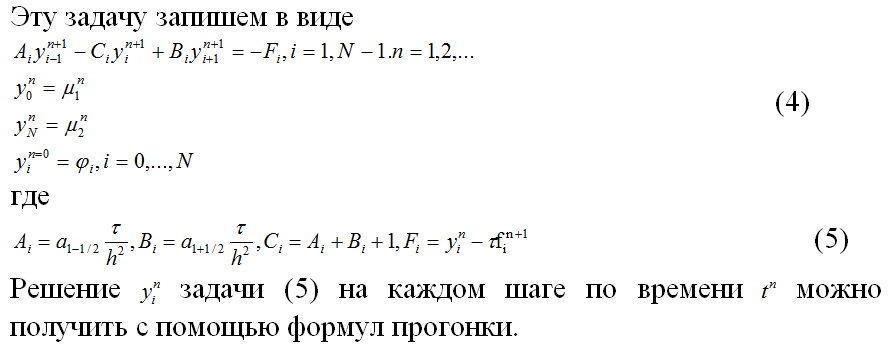

In [6]:
Image(filename='task3_equations(pic5).PNG', width=700, height=200)

### Метод прогонки

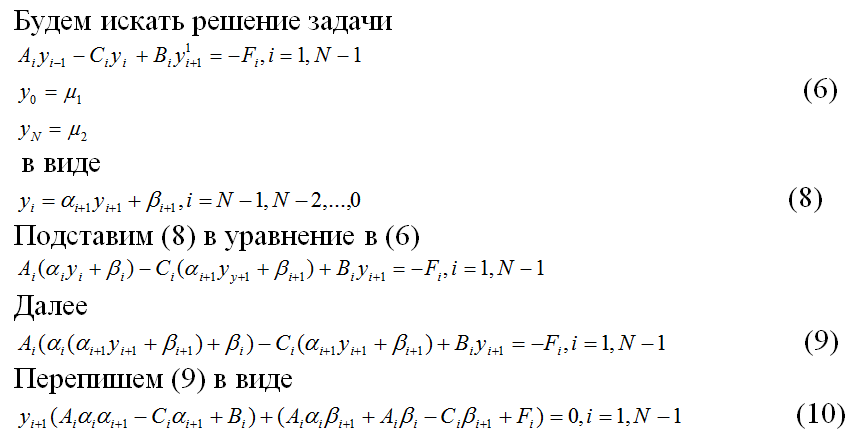

In [7]:
Image(filename='task3_method(pic6).PNG', width=600, height=200)

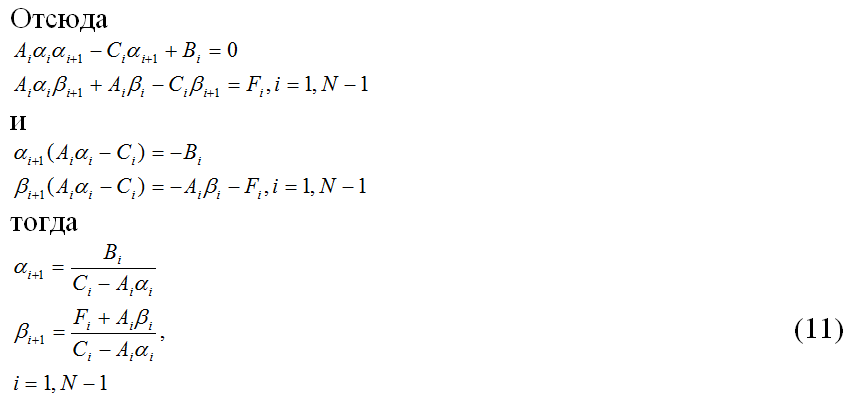

In [8]:
Image(filename='task3_method(pic7).PNG', width=600, height=200)

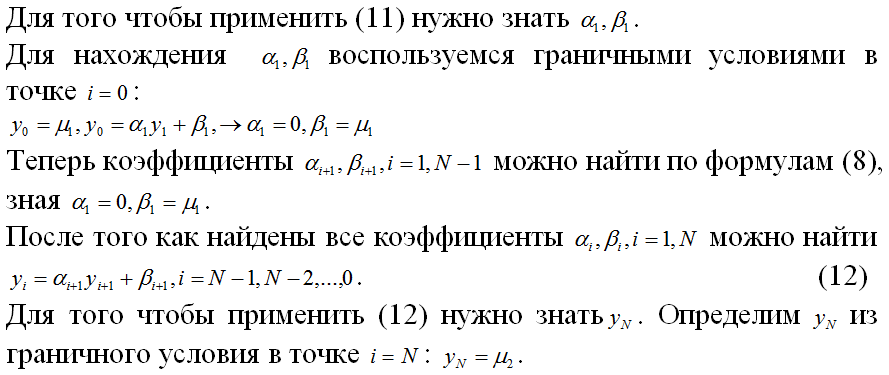

In [9]:
Image(filename='task3_method(pic8).PNG', width=600, height=200)

In [10]:
# функция аналитического решения
def analytical_solution(l, mu1, mu2, t, x):
    return math.sin(l*math.pi*x)*math.exp(-(l*math.pi)**2*t) + mu1 + x*(mu2-mu1)

In [11]:
# функция численного решения
def numerical_solution(N, l, M, t, mu1, mu2):
    
    tau = 0.01
    h = 1.0 / N
    x = np.linspace(0,1,N+2)
    #print(x)
    alpha = np.zeros(N)
    beta = np.zeros(N)
    beta[0] = mu1
    
    
    halfx1 = [(x[i-1]+x[i])/2 for i in range(1,len(x)-1)]
    halfx2 = [(x[i+1]+x[i])/2 for i in range(1,len(x)-1)]
    y = [analytical_solution(l, mu1, mu2, t, x[i]) for i in range(len(x))]
    
    A = [x1*tau/h**2 for x1 in halfx1]
    B = [x2*tau/h**2 for x2 in halfx2]
    C = [A[i] + B[i] + 1 for i in range(N)]
    for i in range(1,N):
        alpha[i] = B[i-1]/(C[i-1] - A[i-1]*alpha[i-1])
        beta[i] = (y[i-1] + A[i-1]*beta[i-1]) / (C[i-1] - A[i-1]*alpha[i-1]) 
        y[i] = alpha[i]*y[i+1] + beta[i]
    
    return np.array(y)

##  <center>  l = 1  </center>

In [12]:
# Аналитическое решение
N = 100 # x grid
t = [0.1, 0.3, 1.0, 2.0]
u1_analytical = np.zeros((len(t), N+2))
mu1 = 1
mu2 = 2
l = 1
xstep = 1.0/N

for i in range(len(t)):
    for j in range(len(u1_analytical[i])):
        #print(t[i])
        u1_analytical[i][j] = analytical_solution(l, mu1, mu2, t[i], xstep*j)

In [13]:
# Численное решение
N = 100
M = 200 # time grid
#t = 0.1 # 0.01 - очень плохая точность
y1_numerical = []
for i in range(len(t)):
    y1_numerical.append(numerical_solution(N, l, M, t[i], mu1, mu2))

###  <center>  t = 0.1, l = 1  </center>

In [14]:
t1 = 0.1
tau = 0.01
len(y1_numerical[0])

102

In [15]:
len(u1_analytical[0])

102

In [16]:
u1_analytical[0]

array([1.        , 1.02170704, 1.04340252, 1.06507491, 1.08671268,
       1.10830435, 1.12983848, 1.1513037 , 1.17268867, 1.19398217,
       1.21517306, 1.23625028, 1.25720291, 1.27802013, 1.29869128,
       1.31920582, 1.33955337, 1.35972373, 1.37970685, 1.39949288,
       1.41907217, 1.43843526, 1.45757292, 1.47647612, 1.49513607,
       1.51354424, 1.53169232, 1.54957228, 1.56717633, 1.58449697,
       1.60152698, 1.61825941, 1.63468764, 1.6508053 , 1.66660637,
       1.68208512, 1.69723614, 1.71205434, 1.72653498, 1.74067364,
       1.75446622, 1.76790898, 1.78099854, 1.79373183, 1.80610616,
       1.81811919, 1.82976893, 1.84105375, 1.85197239, 1.86252393,
       1.87270784, 1.88252393, 1.89197239, 1.90105375, 1.90976893,
       1.91811919, 1.92610616, 1.93373183, 1.94099854, 1.94790898,
       1.95446622, 1.96067364, 1.96653498, 1.97205434, 1.97723614,
       1.98208512, 1.98660637, 1.9908053 , 1.99468764, 1.99825941,
       2.00152698, 2.00449697, 2.00717633, 2.00957228, 2.01169

In [17]:
y1_numerical[0]

array([1.        , 1.02141516, 1.04286421, 1.06430276, 1.08570996,
       1.10707131, 1.12837444, 1.14960791, 1.17076065, 1.19182183,
       1.21278076, 1.23362687, 1.2543497 , 1.27493892, 1.29538429,
       1.31567573, 1.33580328, 1.35575716, 1.37552771, 1.39510548,
       1.41448118, 1.43364572, 1.4525902 , 1.47130595, 1.48978448,
       1.50801758, 1.52599723, 1.54371568, 1.56116541, 1.57833917,
       1.59522999, 1.61183114, 1.62813619, 1.644139  , 1.65983371,
       1.67521476, 1.69027689, 1.70501515, 1.71942492, 1.73350186,
       1.74724198, 1.76064161, 1.7736974 , 1.78640635, 1.79876577,
       1.81077333, 1.82242704, 1.83372522, 1.84466658, 1.85525014,
       1.86547527, 1.87534171, 1.88484953, 1.89399913, 1.90279128,
       1.9112271 , 1.91930803, 1.92703587, 1.93441275, 1.94144116,
       1.9481239 , 1.95446412, 1.96046529, 1.96613123, 1.97146606,
       1.97647423, 1.9811605 , 1.98552995, 1.98958796, 1.99334021,
       1.99679268, 1.99995163, 2.00282362, 2.00541547, 2.00773

In [18]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


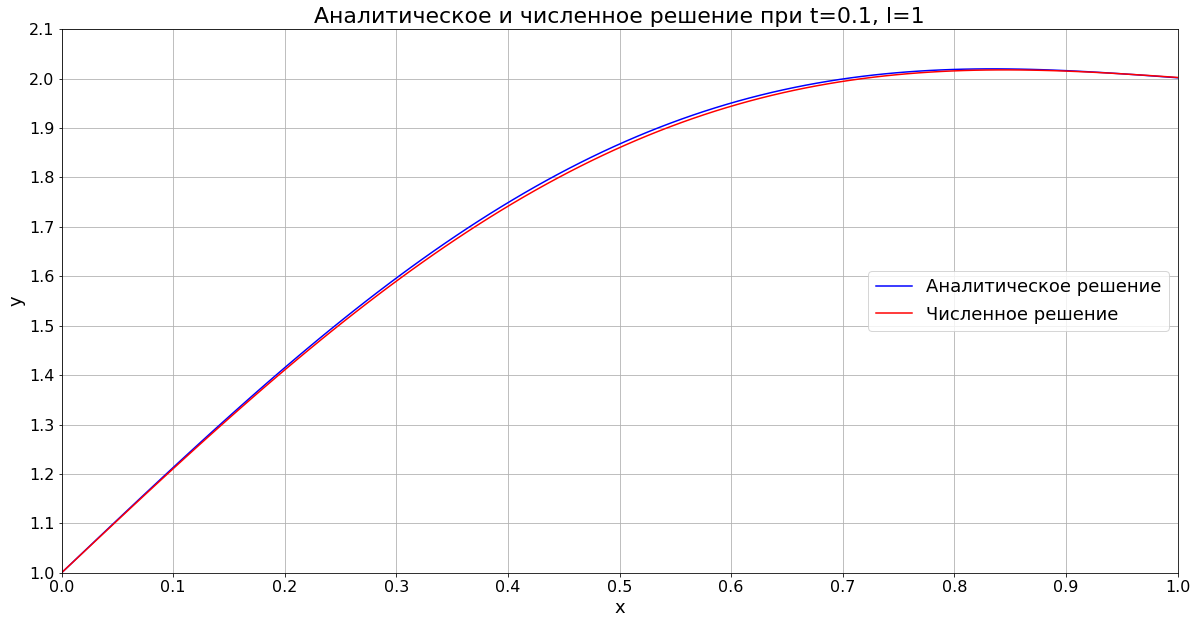

In [19]:
# График аналитического и численного решения при t = 0.1, l = 1
t1 = 0.1
tau = 0.01
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=0.1, l=1', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u1_analytical[0], c = 'blue')
plt.plot(t, y1_numerical[0], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [20]:
# Точность
delta1 = np.zeros(N+2)
delta1 = abs(u1_analytical[0] - y1_numerical[0])
print("Максимальная разница между аналитическим и численным решением:", max(delta1))

Максимальная разница между аналитическим и численным решением: 0.007345853648942802


###  <center>  t = 0.3, l = 1  </center>

In [21]:
len(y1_numerical[1])

102

In [22]:
len(u1_analytical[1])

102

In [23]:
u1_analytical[1]

array([1.        , 1.01162624, 1.02325087, 1.03487229, 1.04648891,
       1.05809912, 1.06970134, 1.08129399, 1.09287549, 1.10444428,
       1.11599882, 1.12753757, 1.13905901, 1.15056164, 1.16204399,
       1.17350457, 1.18494196, 1.19635474, 1.2077415 , 1.21910089,
       1.23043156, 1.2417322 , 1.25300152, 1.26423828, 1.27544124,
       1.28660923, 1.29774109, 1.3088357 , 1.31989199, 1.33090891,
       1.34188545, 1.35282066, 1.36371362, 1.37456343, 1.38536926,
       1.39613032, 1.40684585, 1.41751516, 1.42813757, 1.43871247,
       1.4492393 , 1.45971754, 1.47014672, 1.4805264 , 1.49085622,
       1.50113585, 1.51136502, 1.5215435 , 1.53167111, 1.54174772,
       1.55177327, 1.56174772, 1.57167111, 1.5815435 , 1.59136502,
       1.60113585, 1.61085622, 1.6205264 , 1.63014672, 1.63971754,
       1.6492393 , 1.65871247, 1.66813757, 1.67751516, 1.68684585,
       1.69613032, 1.70536926, 1.71456343, 1.72371362, 1.73282066,
       1.74188545, 1.75090891, 1.75989199, 1.7688357 , 1.77774

In [24]:
y1_numerical[1]

array([1.        , 1.01147211, 1.0229689 , 1.03447066, 1.04597046,
       1.05746478, 1.06895131, 1.0804282 , 1.0918938 , 1.10334656,
       1.114785  , 1.12620764, 1.13761304, 1.14899978, 1.16036645,
       1.17171164, 1.183034  , 1.19433217, 1.20560482, 1.21685063,
       1.22806833, 1.23925666, 1.25041438, 1.26154029, 1.27263323,
       1.28369204, 1.29471562, 1.3057029 , 1.31665283, 1.32756441,
       1.33843666, 1.34926866, 1.36005952, 1.37080838, 1.38151443,
       1.39217689, 1.40279505, 1.41336821, 1.42389572, 1.43437699,
       1.44481147, 1.45519864, 1.46553805, 1.47582926, 1.48607192,
       1.49626569, 1.50641031, 1.51650553, 1.52655118, 1.53654712,
       1.54649328, 1.5563896 , 1.56623609, 1.57603283, 1.58577991,
       1.59547748, 1.60512576, 1.61472498, 1.62427545, 1.63377751,
       1.64323155, 1.65263801, 1.66199736, 1.67131015, 1.68057694,
       1.68979835, 1.69897505, 1.70810773, 1.71719714, 1.72624409,
       1.73524938, 1.74421391, 1.75313857, 1.76202431, 1.77087

In [25]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


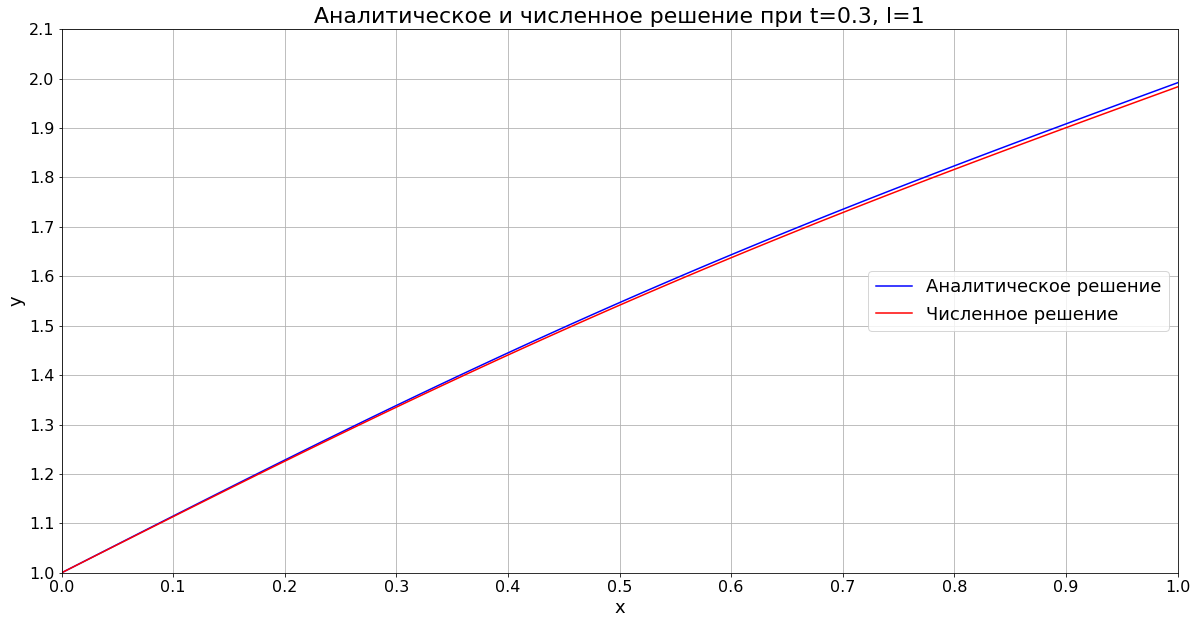

In [26]:
# График аналитического и численного решения при t = 0.3, l = 1
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=0.3, l=1', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u1_analytical[1], c = 'blue')
plt.plot(t, y1_numerical[1], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [27]:
# Точность
delta2 = np.zeros(N+2)
delta2 = abs(u1_analytical[1] - y1_numerical[1])
print("Максимальная разница между аналитическим и численным решением:", max(delta2))

Максимальная разница между аналитическим и численным решением: 0.008373762345055269


###  <center>  t = 1.0, l = 1  </center>

In [28]:
len(y1_numerical[2])

102

In [29]:
len(u1_analytical[2])

102

In [30]:
u1_analytical[2]

array([1.        , 1.01000162, 1.02000325, 1.03000487, 1.04000648,
       1.05000809, 1.06000969, 1.07001128, 1.08001286, 1.09001443,
       1.10001598, 1.11001752, 1.12001904, 1.13002054, 1.14002202,
       1.15002348, 1.16002492, 1.17002633, 1.18002771, 1.19002907,
       1.2000304 , 1.2100317 , 1.22003297, 1.23003421, 1.24003541,
       1.25003657, 1.2600377 , 1.2700388 , 1.28003985, 1.29004087,
       1.30004184, 1.31004278, 1.32004367, 1.33004452, 1.34004533,
       1.35004609, 1.3600468 , 1.37004747, 1.38004809, 1.39004867,
       1.40004919, 1.41004967, 1.4200501 , 1.43005048, 1.44005081,
       1.45005109, 1.46005132, 1.47005149, 1.48005162, 1.4900517 ,
       1.50005172, 1.5100517 , 1.52005162, 1.53005149, 1.54005132,
       1.55005109, 1.56005081, 1.57005048, 1.5800501 , 1.59004967,
       1.60004919, 1.61004867, 1.62004809, 1.63004747, 1.6400468 ,
       1.65004609, 1.66004533, 1.67004452, 1.68004367, 1.69004278,
       1.70004184, 1.71004087, 1.72003985, 1.7300388 , 1.74003

In [31]:
y1_numerical[2]

array([1.        , 1.0098697 , 1.01976259, 1.02966295, 1.03956607,
       1.04947024, 1.05937473, 1.06927925, 1.07918368, 1.08908796,
       1.09899208, 1.10889605, 1.11879986, 1.12870354, 1.13860708,
       1.14851051, 1.15841383, 1.16831706, 1.17822019, 1.18812323,
       1.19802619, 1.20792908, 1.21783189, 1.22773464, 1.23763731,
       1.24753993, 1.25744248, 1.26734496, 1.27724739, 1.28714976,
       1.29705207, 1.30695432, 1.31685651, 1.32675865, 1.33666073,
       1.34656275, 1.35646472, 1.36636663, 1.37626848, 1.38617028,
       1.39607203, 1.40597371, 1.41587535, 1.42577692, 1.43567844,
       1.44557991, 1.45548132, 1.46538267, 1.47528397, 1.48518522,
       1.49508641, 1.50498754, 1.51488862, 1.52478965, 1.53469062,
       1.54459154, 1.55449241, 1.56439322, 1.57429399, 1.5841947 ,
       1.59409536, 1.60399597, 1.61389652, 1.62379703, 1.6336975 ,
       1.64359791, 1.65349828, 1.6633986 , 1.67329887, 1.6831991 ,
       1.69309929, 1.70299943, 1.71289953, 1.72279959, 1.73269

In [32]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


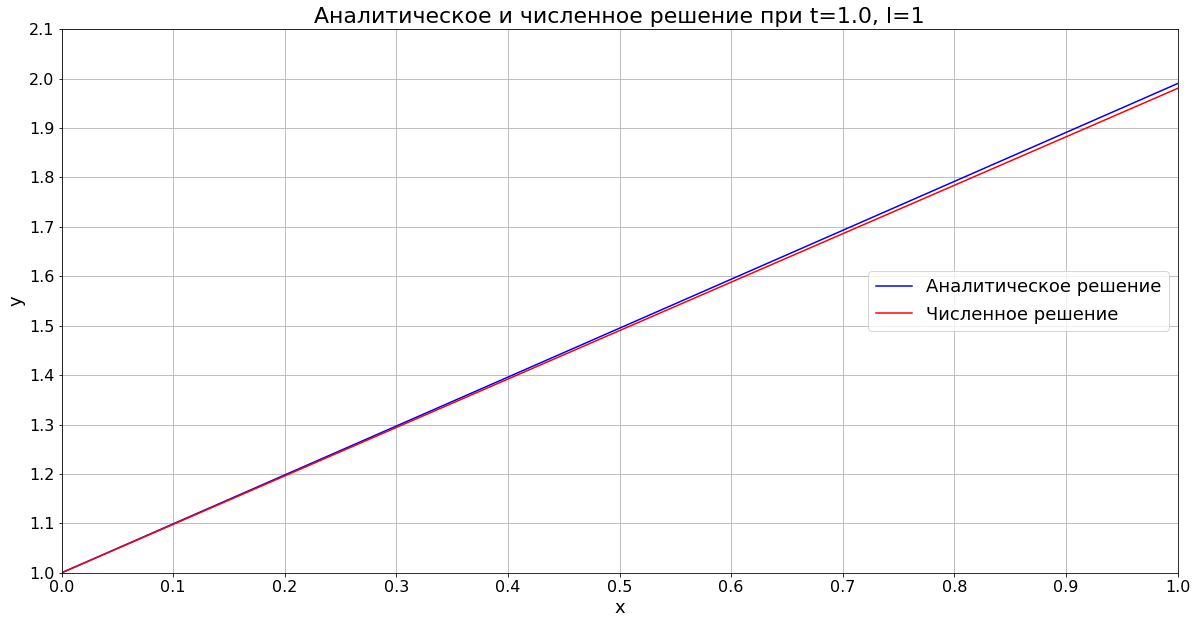

In [33]:
# График аналитического и численного решения при t = 1.0, l = 1
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=1.0, l=1', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u1_analytical[2], c = 'blue')
plt.plot(t, y1_numerical[2], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [34]:
# Точность
delta3 = np.zeros(N+2)
delta3 = abs(u1_analytical[2] - y1_numerical[2])
print("Максимальная разница между аналитическим и численным решением:", max(delta3))

Максимальная разница между аналитическим и численным решением: 0.009998375335459553


###  <center>  t = 2.0, l = 1  </center>

In [35]:
len(y1_numerical[3])

102

In [36]:
len(u1_analytical[3])

102

In [37]:
u1_analytical[3]

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01])

In [38]:
y1_numerical[3]

array([1.        , 1.0098681 , 1.01975938, 1.02965814, 1.03955967,
       1.04946224, 1.05936515, 1.0692681 , 1.07917097, 1.0890737 ,
       1.09897629, 1.10887874, 1.11878105, 1.12868324, 1.13858532,
       1.14848731, 1.15838921, 1.16829104, 1.1781928 , 1.1880945 ,
       1.19799615, 1.20789775, 1.21779931, 1.22770083, 1.23760232,
       1.24750378, 1.2574052 , 1.26730661, 1.27720799, 1.28710934,
       1.29701068, 1.306912  , 1.31681331, 1.3267146 , 1.33661587,
       1.34651714, 1.35641839, 1.36631963, 1.37622086, 1.38612208,
       1.39602329, 1.40592449, 1.41582568, 1.42572687, 1.43562805,
       1.44552922, 1.45543039, 1.46533155, 1.47523271, 1.48513385,
       1.495035  , 1.50493614, 1.51483728, 1.52473841, 1.53463953,
       1.54454066, 1.55444178, 1.56434289, 1.57424401, 1.58414511,
       1.59404622, 1.60394732, 1.61384842, 1.62374952, 1.63365062,
       1.64355171, 1.6534528 , 1.66335389, 1.67325497, 1.68315606,
       1.69305714, 1.70295822, 1.71285929, 1.72276037, 1.73266

In [39]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


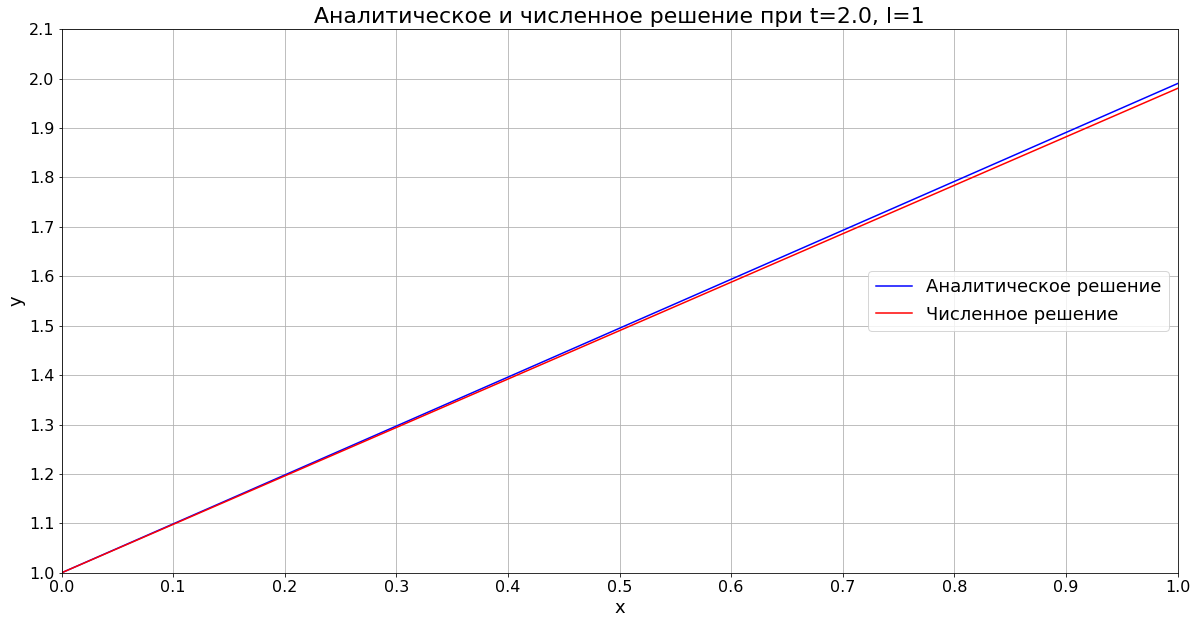

In [40]:
# График аналитического и численного решения при t = 2.0, l = 1
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=2.0, l=1', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u1_analytical[3], c = 'blue')
plt.plot(t, y1_numerical[3], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [41]:
# Точность
delta4 = np.zeros(N+2)
delta4 = abs(u1_analytical[3] - y1_numerical[3])
print("Максимальная разница между аналитическим и численным решением:", max(delta4))

Максимальная разница между аналитическим и численным решением: 0.00999999991596745


##  <center>  l = 2  </center>

In [42]:
# Аналитическое решение
N = 100 # x grid
t = [0.1, 0.3, 1.0, 2.0]
u2_analytical = np.zeros((len(t), N+2))
mu1 = 1
mu2 = 2
l = 2
xstep = 1.0/N

for i in range(len(t)):
    for j in range(len(u2_analytical[i])):
        u2_analytical[i][j] = analytical_solution(l, mu1, mu2, t[i], xstep*j)

In [43]:
# Численное решение
N = 100
M = 200 # time grid
y2_numerical = []
for i in range(len(t)):
    y2_numerical.append(numerical_solution(N, l, M, t[i], mu1, mu2))

###  <center>  t = 0.1, l = 2  </center>

In [44]:
len(y2_numerical[0])

102

In [45]:
len(u2_analytical[0])

102

In [46]:
u2_analytical[0]

array([1.        , 1.01121162, 1.02241847, 1.03361577, 1.0447988 ,
       1.05596289, 1.06710344, 1.07821597, 1.08929606, 1.10033948,
       1.11134208, 1.12229993, 1.13320923, 1.1440664 , 1.15486806,
       1.16561104, 1.17629241, 1.18690948, 1.19745982, 1.20794125,
       1.21835187, 1.22869007, 1.23895451, 1.24914415, 1.25925823,
       1.2692963 , 1.27925823, 1.28914415, 1.29895451, 1.30869007,
       1.31835187, 1.32794125, 1.33745982, 1.34690948, 1.35629241,
       1.36561104, 1.37486806, 1.3840664 , 1.39320923, 1.40229993,
       1.41134208, 1.42033948, 1.42929606, 1.43821597, 1.44710344,
       1.45596289, 1.4647988 , 1.47361577, 1.48241847, 1.49121162,
       1.5       , 1.50878838, 1.51758153, 1.52638423, 1.5352012 ,
       1.54403711, 1.55289656, 1.56178403, 1.57070394, 1.57966052,
       1.58865792, 1.59770007, 1.60679077, 1.6159336 , 1.62513194,
       1.63438896, 1.64370759, 1.65309052, 1.66254018, 1.67205875,
       1.68164813, 1.69130993, 1.70104549, 1.71085585, 1.72074

In [47]:
y2_numerical[0]

array([1.        , 1.01106144, 1.02214208, 1.03322008, 1.04428582,
       1.05533301, 1.06635656, 1.07735189, 1.08831472, 1.09924097,
       1.11012672, 1.12096824, 1.13176195, 1.14250449, 1.15319267,
       1.16382349, 1.17439422, 1.18490231, 1.19534547, 1.20572166,
       1.21602909, 1.22626625, 1.23643188, 1.24652501, 1.25654493,
       1.26649124, 1.2763638 , 1.28616276, 1.29588857, 1.30554193,
       1.31512386, 1.32463561, 1.33407873, 1.34345504, 1.35276659,
       1.3620157 , 1.37120493, 1.38033705, 1.38941509, 1.39844225,
       1.40742194, 1.41635775, 1.42525344, 1.43411294, 1.44294028,
       1.45173964, 1.46051532, 1.46927168, 1.47801316, 1.48674428,
       1.49546957, 1.50419359, 1.51292092, 1.5216561 , 1.53040365,
       1.53916805, 1.54795369, 1.5567649 , 1.56560589, 1.57448078,
       1.58339353, 1.59234796, 1.60134774, 1.61039635, 1.61949707,
       1.62865301, 1.63786704, 1.6471418 , 1.65647972, 1.66588295,
       1.67535342, 1.68489277, 1.69450239, 1.7041834 , 1.71393

In [48]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


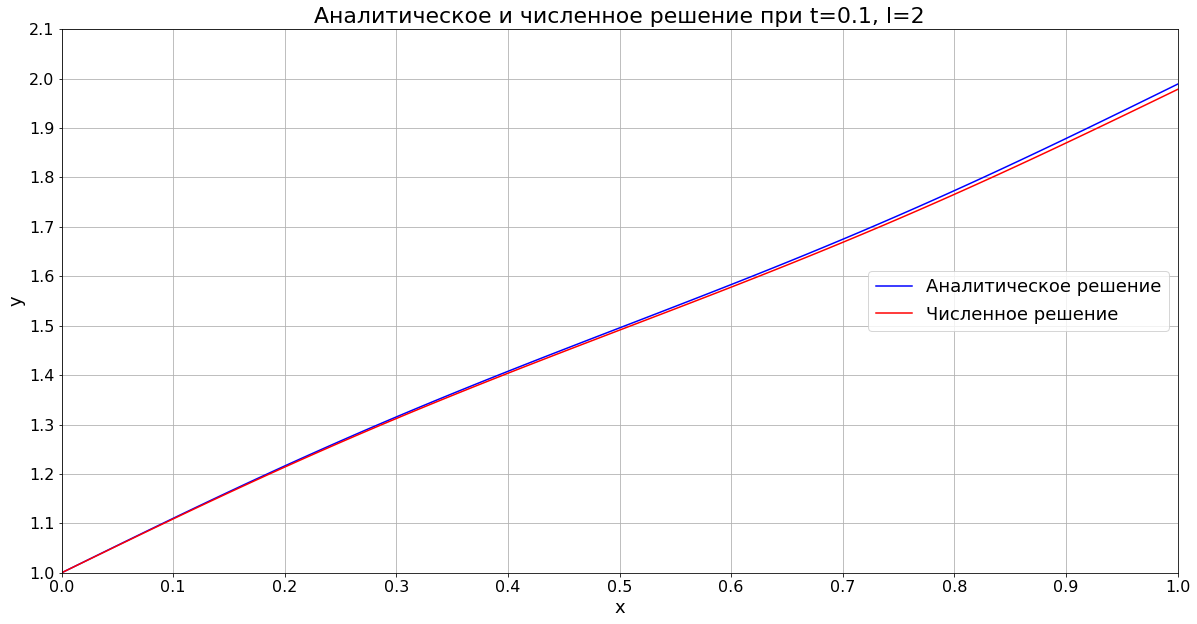

In [49]:
# График аналитического и численного решения при t = 0.1, l = 2
t1 = 0.1
tau = 0.01
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=0.1, l=2', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u2_analytical[0], c = 'blue')
plt.plot(t, y2_numerical[0], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [50]:
# Точность
delta1 = np.zeros(N+2)
delta1 = abs(u2_analytical[0] - y2_numerical[0])
print("Максимальная разница между аналитическим и численным решением:", max(delta1))

Максимальная разница между аналитическим и численным решением: 0.011211624884778004


###  <center>  t = 0.3, l = 2  </center>

In [51]:
len(y2_numerical[1])

102

In [52]:
len(u2_analytical[1])

102

In [53]:
u2_analytical[1]

array([1.        , 1.01000045, 1.0200009 , 1.03000135, 1.04000179,
       1.05000222, 1.06000264, 1.07000306, 1.08000346, 1.09000385,
       1.10000422, 1.11000458, 1.12000492, 1.13000524, 1.14000554,
       1.15000581, 1.16000607, 1.1700063 , 1.1800065 , 1.19000668,
       1.20000683, 1.21000696, 1.22000706, 1.23000713, 1.24000717,
       1.25000718, 1.26000717, 1.27000713, 1.28000706, 1.29000696,
       1.30000683, 1.31000668, 1.3200065 , 1.3300063 , 1.34000607,
       1.35000581, 1.36000554, 1.37000524, 1.38000492, 1.39000458,
       1.40000422, 1.41000385, 1.42000346, 1.43000306, 1.44000264,
       1.45000222, 1.46000179, 1.47000135, 1.4800009 , 1.49000045,
       1.5       , 1.50999955, 1.5199991 , 1.52999865, 1.53999821,
       1.54999778, 1.55999736, 1.56999694, 1.57999654, 1.58999615,
       1.59999578, 1.60999542, 1.61999508, 1.62999476, 1.63999446,
       1.64999419, 1.65999393, 1.6699937 , 1.6799935 , 1.68999332,
       1.69999317, 1.70999304, 1.71999294, 1.72999287, 1.73999

In [54]:
y2_numerical[1]

array([1.        , 1.00986854, 1.01976027, 1.02965947, 1.03956143,
       1.04946443, 1.05936775, 1.06927111, 1.07917437, 1.08907749,
       1.09898044, 1.10888324, 1.11878588, 1.12868839, 1.13859076,
       1.14849302, 1.15839517, 1.16829723, 1.17819919, 1.18810107,
       1.19800286, 1.20790459, 1.21780625, 1.22770784, 1.23760937,
       1.24751084, 1.25741226, 1.26731363, 1.27721494, 1.28711621,
       1.29701743, 1.3069186 , 1.31681974, 1.32672083, 1.33662189,
       1.34652291, 1.35642389, 1.36632484, 1.37622577, 1.38612666,
       1.39602753, 1.40592837, 1.41582919, 1.42572999, 1.43563077,
       1.44553153, 1.45543228, 1.46533301, 1.47523374, 1.48513445,
       1.49503516, 1.50493586, 1.51483656, 1.52473726, 1.53463795,
       1.54453865, 1.55443936, 1.56434007, 1.57424079, 1.58414151,
       1.59404225, 1.603943  , 1.61384377, 1.62374455, 1.63364534,
       1.64354616, 1.65344699, 1.66334785, 1.67324872, 1.68314962,
       1.69305054, 1.70295149, 1.71285246, 1.72275345, 1.73265

In [55]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


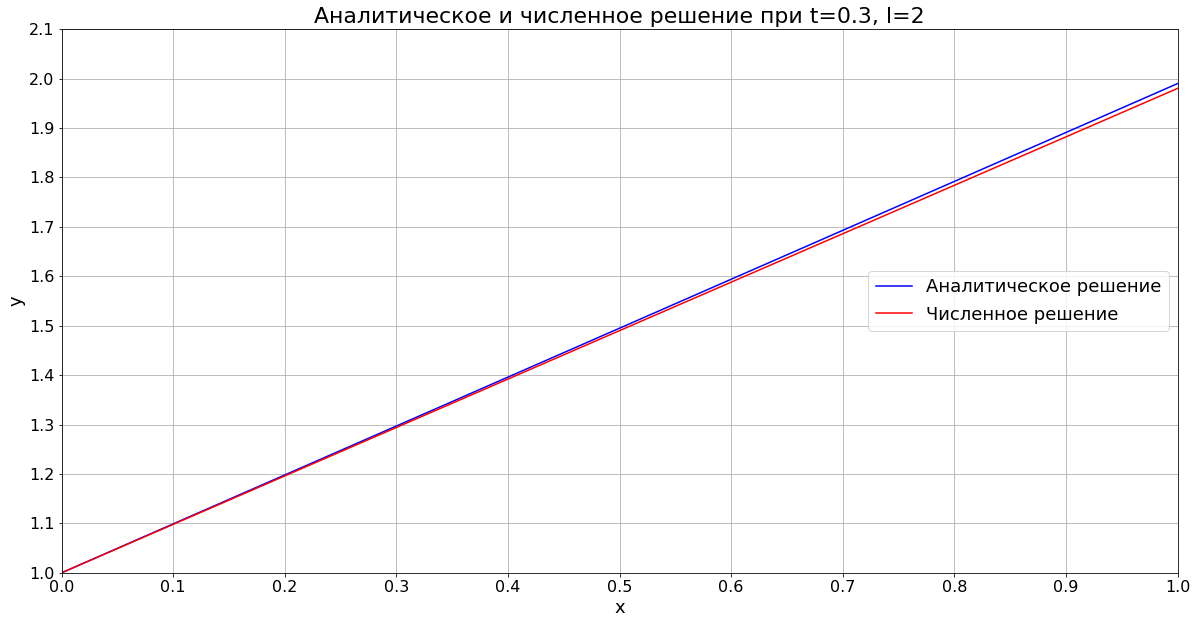

In [56]:
# График аналитического и численного решения при t = 0.3, l = 2
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=0.3, l=2', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u2_analytical[1], c = 'blue')
plt.plot(t, y2_numerical[1], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [57]:
# Точность
delta2 = np.zeros(N+2)
delta2 = abs(u2_analytical[1] - y2_numerical[1])
print("Максимальная разница между аналитическим и численным решением:", max(delta2))

Максимальная разница между аналитическим и численным решением: 0.010000451145261824


###  <center>  t = 1.0, l = 2  </center>

In [58]:
len(y2_numerical[2])

102

In [59]:
len(u2_analytical[2])

102

In [60]:
u2_analytical[2]

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01])

In [61]:
y2_numerical[2]

array([1.        , 1.0098681 , 1.01975938, 1.02965814, 1.03955967,
       1.04946224, 1.05936515, 1.0692681 , 1.07917097, 1.0890737 ,
       1.09897629, 1.10887874, 1.11878105, 1.12868324, 1.13858532,
       1.14848731, 1.15838921, 1.16829104, 1.1781928 , 1.1880945 ,
       1.19799615, 1.20789775, 1.21779931, 1.22770083, 1.23760232,
       1.24750377, 1.2574052 , 1.2673066 , 1.27720798, 1.28710934,
       1.29701068, 1.306912  , 1.31681331, 1.3267146 , 1.33661587,
       1.34651713, 1.35641839, 1.36631963, 1.37622085, 1.38612207,
       1.39602328, 1.40592449, 1.41582568, 1.42572687, 1.43562805,
       1.44552922, 1.45543039, 1.46533155, 1.4752327 , 1.48513385,
       1.495035  , 1.50493614, 1.51483727, 1.5247384 , 1.53463953,
       1.54454065, 1.55444177, 1.56434289, 1.574244  , 1.58414511,
       1.59404622, 1.60394732, 1.61384842, 1.62374952, 1.63365061,
       1.64355171, 1.6534528 , 1.66335389, 1.67325497, 1.68315605,
       1.69305714, 1.70295822, 1.71285929, 1.72276037, 1.73266

In [62]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


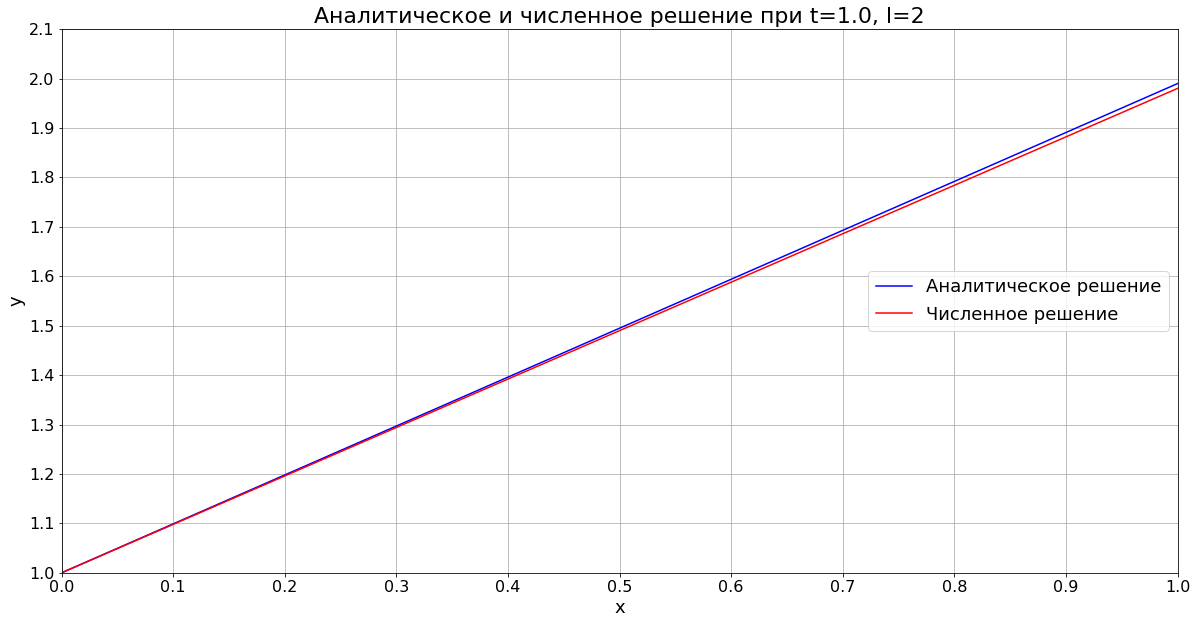

In [63]:
# График аналитического и численного решения при t = 1.0, l = 2
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=1.0, l=2', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u2_analytical[2], c = 'blue')
plt.plot(t, y2_numerical[2], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [64]:
# Точность
delta3 = np.zeros(N+2)
delta3 = abs(u2_analytical[2] - y2_numerical[2])
print("Максимальная разница между аналитическим и численным решением:", max(delta3))

Максимальная разница между аналитическим и численным решением: 0.009999999999999787


###  <center>  t = 2.0, l = 2  </center>

In [65]:
len(y2_numerical[3])

102

In [66]:
len(u2_analytical[3])

102

In [67]:
u2_analytical[3]

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01])

In [68]:
y2_numerical[3]

array([1.        , 1.0098681 , 1.01975938, 1.02965814, 1.03955967,
       1.04946224, 1.05936515, 1.0692681 , 1.07917097, 1.0890737 ,
       1.09897629, 1.10887874, 1.11878105, 1.12868324, 1.13858532,
       1.14848731, 1.15838921, 1.16829104, 1.1781928 , 1.1880945 ,
       1.19799615, 1.20789775, 1.21779931, 1.22770083, 1.23760232,
       1.24750377, 1.2574052 , 1.2673066 , 1.27720798, 1.28710934,
       1.29701068, 1.306912  , 1.31681331, 1.3267146 , 1.33661587,
       1.34651713, 1.35641839, 1.36631963, 1.37622085, 1.38612207,
       1.39602328, 1.40592449, 1.41582568, 1.42572687, 1.43562805,
       1.44552922, 1.45543039, 1.46533155, 1.4752327 , 1.48513385,
       1.495035  , 1.50493614, 1.51483727, 1.5247384 , 1.53463953,
       1.54454065, 1.55444177, 1.56434289, 1.574244  , 1.58414511,
       1.59404622, 1.60394732, 1.61384842, 1.62374952, 1.63365061,
       1.64355171, 1.6534528 , 1.66335389, 1.67325497, 1.68315605,
       1.69305714, 1.70295822, 1.71285929, 1.72276037, 1.73266

In [69]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


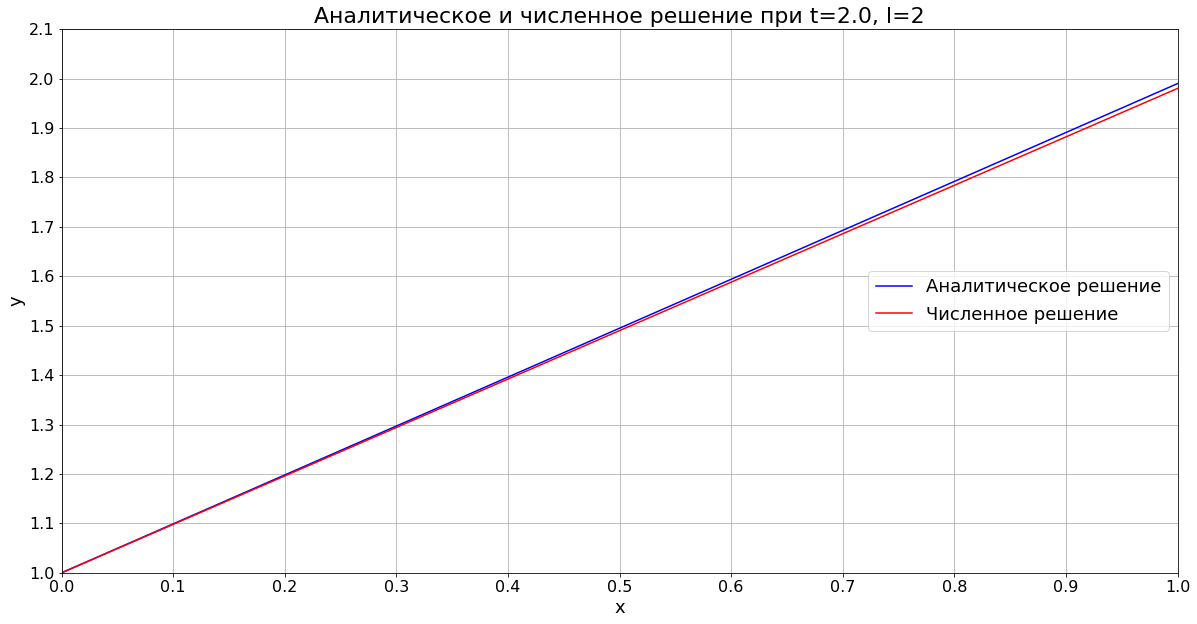

In [70]:
# График аналитического и численного решения при t = 2.0, l = 2
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=2.0, l=2', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u2_analytical[3], c = 'blue')
plt.plot(t, y2_numerical[3], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [71]:
# Точность
delta4 = np.zeros(N+2)
delta4 = abs(u2_analytical[3] - y2_numerical[3])
print("Максимальная разница между аналитическим и численным решением:", max(delta4))

Максимальная разница между аналитическим и численным решением: 0.009999999999999787


##  <center>  l = 3  </center>

In [72]:
# Аналитическое решение
N = 100 # x grid
t = [0.1, 0.3, 1.0, 2.0]
u3_analytical = np.zeros((len(t), N+2))
mu1 = 1
mu2 = 2
l = 3
xstep = 1.0/N

for i in range(len(t)):
    for j in range(len(u3_analytical[i])):
        u3_analytical[i][j] = analytical_solution(l, mu1, mu2, t[i], xstep*j)

In [73]:
# Численное решение
N = 100
M = 200 # time grid
y3_numerical = []
for i in range(len(t)):
    y3_numerical.append(numerical_solution(N, l, M, t[i], mu1, mu2))

###  <center>  t = 0.1, l = 3  </center>

In [74]:
len(y3_numerical[0])

102

In [75]:
len(u3_analytical[0])

102

In [76]:
u3_analytical[0]

array([1.        , 1.01001306, 1.020026  , 1.03003872, 1.04005109,
       1.050063  , 1.06007436, 1.07008506, 1.080095  , 1.0901041 ,
       1.10011227, 1.11011945, 1.12012557, 1.13013057, 1.14013442,
       1.15013707, 1.1601385 , 1.17013871, 1.18013768, 1.19013543,
       1.20013198, 1.21012736, 1.22012161, 1.23011478, 1.24010693,
       1.25009813, 1.26008846, 1.270078  , 1.28006686, 1.29005511,
       1.30004288, 1.31003027, 1.32001739, 1.33000436, 1.33999129,
       1.34997829, 1.35996549, 1.36995299, 1.37994091, 1.38992936,
       1.39991843, 1.40990823, 1.41989884, 1.42989034, 1.43988283,
       1.44987635, 1.45987097, 1.46986673, 1.47986368, 1.48986184,
       1.49986122, 1.50986184, 1.51986368, 1.52986673, 1.53987097,
       1.54987635, 1.55988283, 1.56989034, 1.57989884, 1.58990823,
       1.59991843, 1.60992936, 1.61994091, 1.62995299, 1.63996549,
       1.64997829, 1.65999129, 1.67000436, 1.68001739, 1.69003027,
       1.70004288, 1.71005511, 1.72006686, 1.730078  , 1.74008

In [77]:
y3_numerical[0]

array([1.        , 1.00988093, 1.01978491, 1.02969611, 1.03960972,
       1.0495239 , 1.05943785, 1.06935118, 1.07926368, 1.08917521,
       1.0990857 , 1.10899506, 1.11890327, 1.12881027, 1.13871605,
       1.14862057, 1.15852384, 1.16842586, 1.17832663, 1.18822616,
       1.19812449, 1.20802166, 1.2179177 , 1.22781267, 1.23770664,
       1.24759966, 1.25749183, 1.26738322, 1.27727393, 1.28716405,
       1.29705368, 1.30694293, 1.3168319 , 1.32672071, 1.33660945,
       1.34649825, 1.35638722, 1.36627645, 1.37616607, 1.38605616,
       1.39594683, 1.40583817, 1.41573026, 1.42562319, 1.43551703,
       1.44541184, 1.45530768, 1.46520459, 1.47510261, 1.48500177,
       1.49490208, 1.50480355, 1.51470619, 1.52460996, 1.53451486,
       1.54442085, 1.55432788, 1.5642359 , 1.57414485, 1.58405467,
       1.59396528, 1.60387658, 1.61378851, 1.62370095, 1.63361381,
       1.64352698, 1.65344037, 1.66335386, 1.67326735, 1.68318072,
       1.69309387, 1.70300669, 1.71291908, 1.72283095, 1.73274

In [78]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


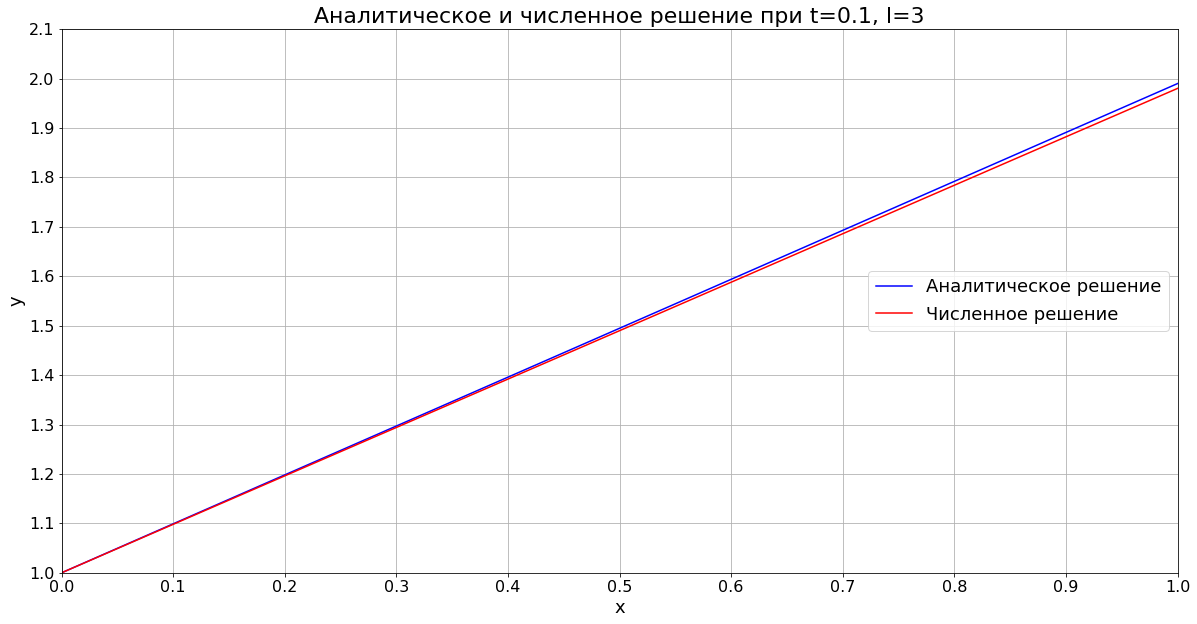

In [79]:
# График аналитического и численного решения при t = 0.1, l = 3
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=0.1, l=3', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u3_analytical[0], c = 'blue')
plt.plot(t, y3_numerical[0], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [80]:
# Точность
delta1 = np.zeros(N+2)
delta1 = abs(u3_analytical[0] - y3_numerical[0])
print("Максимальная разница между аналитическим и численным решением:", max(delta1))

Максимальная разница между аналитическим и численным решением: 0.009986939953213536


###  <center>  t = 0.3, l = 3  </center>

In [81]:
len(y3_numerical[1])

102

In [82]:
len(u3_analytical[1])

102

In [83]:
u3_analytical[1]

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01])

In [84]:
y3_numerical[1]

array([1.        , 1.0098681 , 1.01975938, 1.02965814, 1.03955967,
       1.04946224, 1.05936515, 1.0692681 , 1.07917097, 1.0890737 ,
       1.09897629, 1.10887874, 1.11878105, 1.12868324, 1.13858532,
       1.14848731, 1.15838921, 1.16829104, 1.1781928 , 1.1880945 ,
       1.19799615, 1.20789775, 1.21779931, 1.22770083, 1.23760232,
       1.24750377, 1.2574052 , 1.2673066 , 1.27720798, 1.28710934,
       1.29701068, 1.306912  , 1.31681331, 1.3267146 , 1.33661587,
       1.34651713, 1.35641839, 1.36631963, 1.37622085, 1.38612207,
       1.39602328, 1.40592449, 1.41582568, 1.42572687, 1.43562805,
       1.44552922, 1.45543039, 1.46533155, 1.4752327 , 1.48513385,
       1.495035  , 1.50493614, 1.51483727, 1.5247384 , 1.53463953,
       1.54454065, 1.55444177, 1.56434289, 1.574244  , 1.58414511,
       1.59404622, 1.60394732, 1.61384842, 1.62374952, 1.63365061,
       1.64355171, 1.6534528 , 1.66335389, 1.67325497, 1.68315605,
       1.69305714, 1.70295822, 1.71285929, 1.72276037, 1.73266

In [85]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


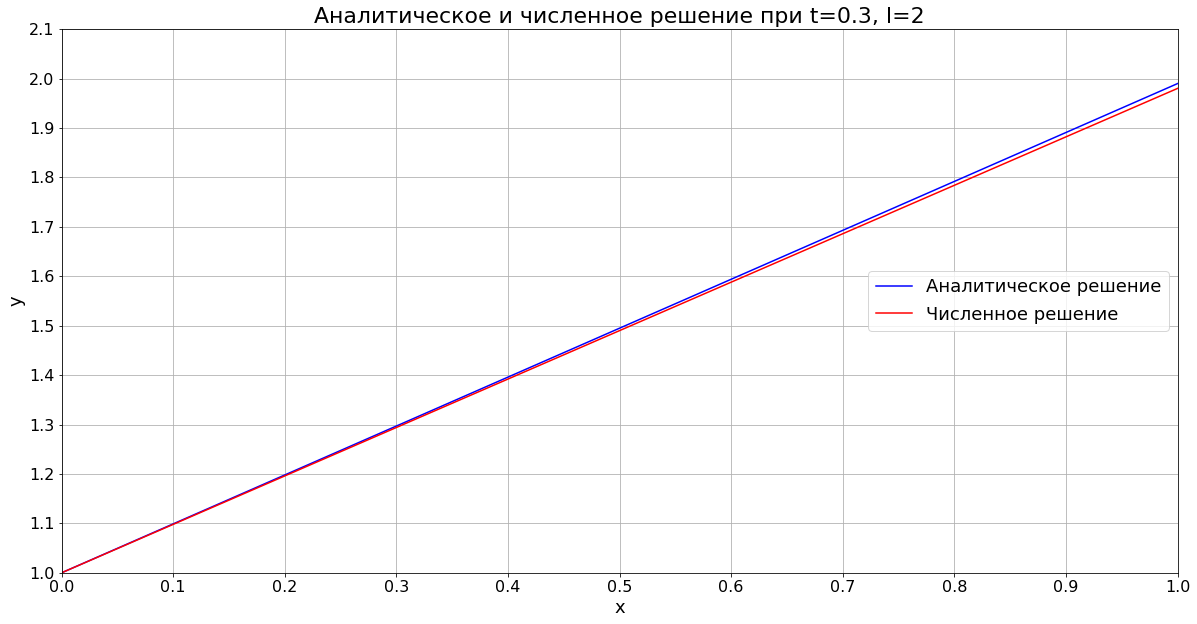

In [86]:
# График аналитического и численного решения при t = 0.3, l = 3
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=0.3, l=2', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u3_analytical[1], c = 'blue')
plt.plot(t, y3_numerical[1], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [87]:
# Точность
delta2 = np.zeros(N+2)
delta2 = abs(u3_analytical[1] - y3_numerical[1])
print("Максимальная разница между аналитическим и численным решением:", max(delta2))

Максимальная разница между аналитическим и численным решением: 0.009999999999748432


###  <center>  t = 1.0, l = 3  </center>

In [88]:
len(y3_numerical[2])

102

In [89]:
len(u3_analytical[2])

102

In [90]:
u3_analytical[2]

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01])

In [91]:
y3_numerical[2]

array([1.        , 1.0098681 , 1.01975938, 1.02965814, 1.03955967,
       1.04946224, 1.05936515, 1.0692681 , 1.07917097, 1.0890737 ,
       1.09897629, 1.10887874, 1.11878105, 1.12868324, 1.13858532,
       1.14848731, 1.15838921, 1.16829104, 1.1781928 , 1.1880945 ,
       1.19799615, 1.20789775, 1.21779931, 1.22770083, 1.23760232,
       1.24750377, 1.2574052 , 1.2673066 , 1.27720798, 1.28710934,
       1.29701068, 1.306912  , 1.31681331, 1.3267146 , 1.33661587,
       1.34651713, 1.35641839, 1.36631963, 1.37622085, 1.38612207,
       1.39602328, 1.40592449, 1.41582568, 1.42572687, 1.43562805,
       1.44552922, 1.45543039, 1.46533155, 1.4752327 , 1.48513385,
       1.495035  , 1.50493614, 1.51483727, 1.5247384 , 1.53463953,
       1.54454065, 1.55444177, 1.56434289, 1.574244  , 1.58414511,
       1.59404622, 1.60394732, 1.61384842, 1.62374952, 1.63365061,
       1.64355171, 1.6534528 , 1.66335389, 1.67325497, 1.68315605,
       1.69305714, 1.70295822, 1.71285929, 1.72276037, 1.73266

In [92]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


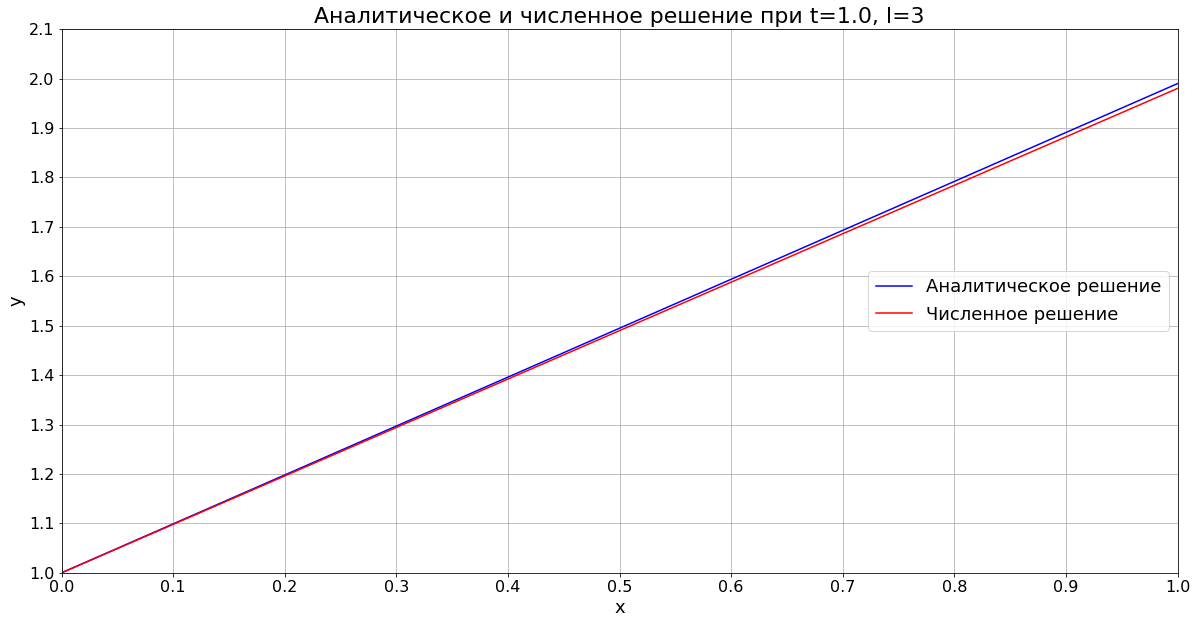

In [93]:
# График аналитического и численного решения при t = 1.0, l = 3
t3 = 1.0
tau = 0.01
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=1.0, l=3', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u3_analytical[2], c = 'blue')
plt.plot(t, y3_numerical[2], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [94]:
# Точность
delta3 = np.zeros(N+2)
delta3 = abs(u3_analytical[2] - y3_numerical[2])
print("Максимальная разница между аналитическим и численным решением:", max(delta3))

Максимальная разница между аналитическим и численным решением: 0.009999999999999787


###  <center>  t = 2.0, l = 3  </center>

In [95]:
len(y3_numerical[3])

102

In [96]:
len(u3_analytical[3])

102

In [97]:
u3_analytical[3]

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01])

In [98]:
y3_numerical[3]

array([1.        , 1.0098681 , 1.01975938, 1.02965814, 1.03955967,
       1.04946224, 1.05936515, 1.0692681 , 1.07917097, 1.0890737 ,
       1.09897629, 1.10887874, 1.11878105, 1.12868324, 1.13858532,
       1.14848731, 1.15838921, 1.16829104, 1.1781928 , 1.1880945 ,
       1.19799615, 1.20789775, 1.21779931, 1.22770083, 1.23760232,
       1.24750377, 1.2574052 , 1.2673066 , 1.27720798, 1.28710934,
       1.29701068, 1.306912  , 1.31681331, 1.3267146 , 1.33661587,
       1.34651713, 1.35641839, 1.36631963, 1.37622085, 1.38612207,
       1.39602328, 1.40592449, 1.41582568, 1.42572687, 1.43562805,
       1.44552922, 1.45543039, 1.46533155, 1.4752327 , 1.48513385,
       1.495035  , 1.50493614, 1.51483727, 1.5247384 , 1.53463953,
       1.54454065, 1.55444177, 1.56434289, 1.574244  , 1.58414511,
       1.59404622, 1.60394732, 1.61384842, 1.62374952, 1.63365061,
       1.64355171, 1.6534528 , 1.66335389, 1.67325497, 1.68315605,
       1.69305714, 1.70295822, 1.71285929, 1.72276037, 1.73266

In [99]:
t = range(N+2)
t = [t[i]/(N-1) for i in range(len(t))]
print(len(t))

102


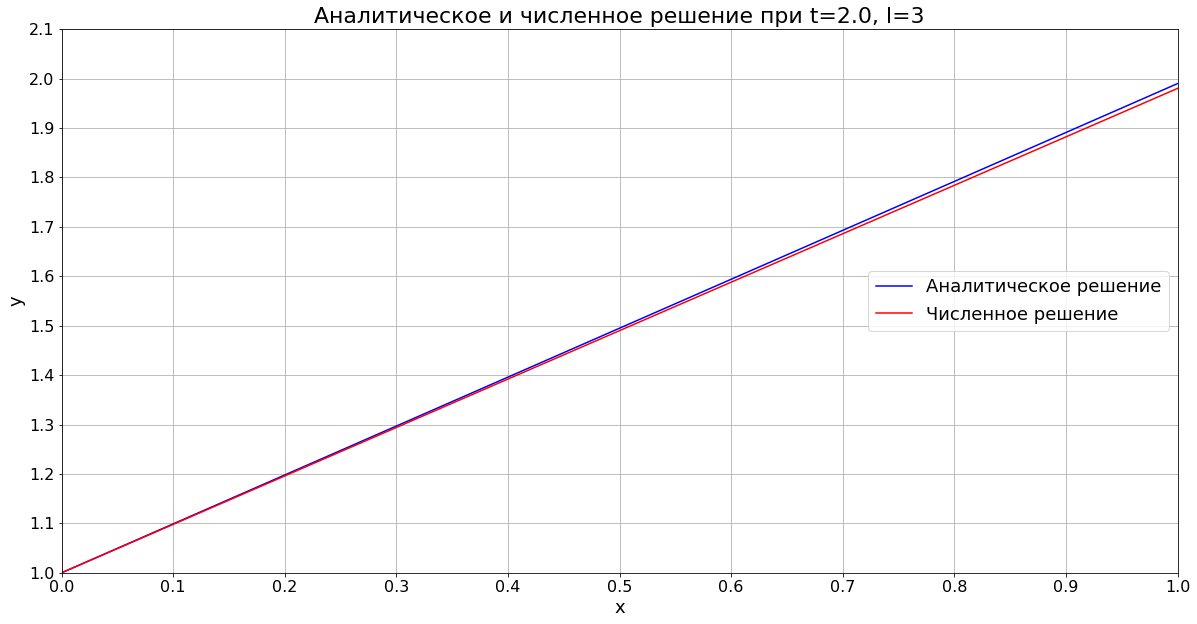

In [100]:
# График аналитического и численного решения при t = 2.0, l = 3
xlim_min = 0.0
xlim_max = 1.0
ylim_min = 1.0
ylim_max = 2.1
plt.figure(figsize = (20,10))
plt.axes(xlim=(xlim_min, xlim_max), ylim=(ylim_min, ylim_max))
plt.title('Аналитическое и численное решение при t=2.0, l=3', fontsize = 22)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.grid(True)
plt.plot(t, u3_analytical[3], c = 'blue')
plt.plot(t, y3_numerical[3], c = 'red')
plt.legend(['Аналитическое решение', 'Численное решение'], loc = 'center right', fontsize = 18)
plt.xticks(np.linspace(xlim_min, xlim_max, 11), fontsize = 16)
plt.yticks(np.linspace(ylim_min, ylim_max, 12), fontsize = 16);

In [101]:
# Точность
delta4 = np.zeros(N+2)
delta4 = abs(u3_analytical[3] - y3_numerical[3])
print("Максимальная разница между аналитическим и численным решением:", max(delta4))

Максимальная разница между аналитическим и численным решением: 0.009999999999999787
